In [69]:
#Probelm1-(2)normal equation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("P1_data.txt")
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,B
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [70]:
data.columns
x1 = data["A1"]
x2 = data["A2"]
x3 = data["A3"]
x4 = data["A4"]
x5 = data["A5"]
x6 = data["A6"]
x7 = data["A7"]
x8 = data["A8"]
x9 = data["A9"]
x10 = data["A10"]
x11 = data["A11"]
y = data["B"]

In [71]:
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)
x6 = np.array(x6)
x7 = np.array(x7)
x8 = np.array(x8)
x9 = np.array(x9)
x10 = np.array(x10)
x11 = np.array(x11)
y = np.array(y)

In [72]:
n = len(x1)
x_bias = np.ones((n,1))

In [73]:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))
x4_new = np.reshape(x4,(n,1))
x5_new = np.reshape(x5,(n,1))
x6_new = np.reshape(x6,(n,1))
x7_new = np.reshape(x7,(n,1))
x8_new = np.reshape(x8,(n,1))
x9_new = np.reshape(x9,(n,1))
x10_new = np.reshape(x10,(n,1))
x11_new = np.reshape(x11,(n,1))

In [74]:
x_new = np.append(x_bias, x1_new, axis=1)
x_new = np.append(x_new, x2_new, axis=1)
x_new = np.append(x_new, x3_new, axis=1)
x_new = np.append(x_new, x4_new, axis=1)
x_new = np.append(x_new, x5_new, axis=1)
x_new = np.append(x_new, x6_new, axis=1)
x_new = np.append(x_new, x7_new, axis=1)
x_new = np.append(x_new, x8_new, axis=1)
x_new = np.append(x_new, x9_new, axis=1)
x_new = np.append(x_new, x10_new, axis=1)
x_new = np.append(x_new, x11_new, axis=1)

In [75]:
x_new_transpose = np.transpose(x_new)
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)
temp_2 = x_new_transpose.dot(y)
theta = temp_1.dot(temp_2)

In [76]:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]
beta_4 = theta[4]
beta_5 = theta[5]
beta_6 = theta[6]
beta_7 = theta[7]
beta_8 = theta[8]
beta_9 = theta[9]
beta_10 = theta[10]
beta_11 = theta[11]

In [77]:
def predict_values(beta_0, beta_1,beta_2, beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9,beta_10,beta_11, A1, A2,A3,A4,A5,A6,A7,A8,A9,A10,A11):
    predicted_value = beta_0 + beta_1*A1 + beta_2*A2 + beta_3*A3 + beta_4*A4 + beta_5*A5 + beta_6*A6 + beta_7*A7 + beta_8*A8 
    + beta_9*A9 + beta_10*A10 + beta_11*A11
    return predicted_value

In [78]:
print("normal equation Price: ",predict_values(beta_0, beta_1,beta_2, beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9,beta_10,beta_11, 11.5, 2.0, 7.25, 1.75, 1, 8, 5, 15, 2, 1, 1))

normal equation Price:  45.88908875637964


In [79]:
#Probelm1-(2) gradient equation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('P1_data.txt')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,B
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [80]:
X = df.values[:, 0:11]  
y = df.values[:, 11]  
m = len(y) 

In [81]:
def normalz(x):
    mu = np.mean(x, axis = 0)
    sig = np.std(x, axis= 0, ddof = 1)
    norm = (x - mu)/sig
    return norm, mu, sig

def cost_1(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    return 1/(2 * m) * errors.T.dot(errors)

def gradient(X, y, theta, learning_rate, iterations):
    ccost = np.zeros(iterations)
    for i in range(iterations):
        prd = X.dot(theta)
        error = np.subtract(prd, y)
        delta = (learning_rate / m) * X.transpose().dot(error);
        theta = theta - delta;
        ccost[i] = cost_1(X, y, theta)
    return theta, ccost

In [82]:
X, mu, sig = normalz(X)
X = np.hstack((np.ones((m,1)), X))
theta = np.zeros(12)
iterations = 400;
learning_rate = 0.15;
theta, cost = gradient(X, y, theta, learning_rate, iterations)
normalize_test_data = ((np.array([11.5, 2.0, 7.25, 1.75, 1, 8, 5, 15, 2, 1, 1]) - mu) / sig)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print('Price:', price)

Price: 52.111996141594226


Text(0.5, 1.0, 'Convergence of gradient descent')

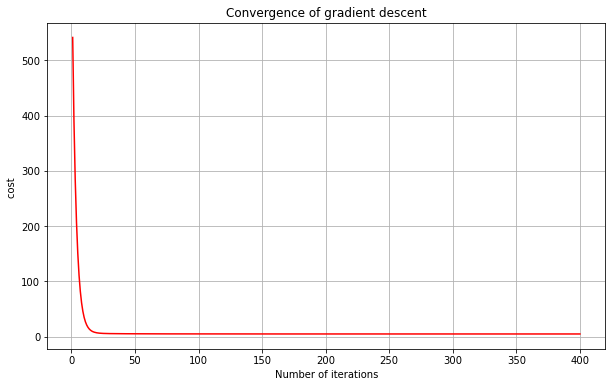

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost, color ='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost ")
plt.title("Convergence of gradient descent")

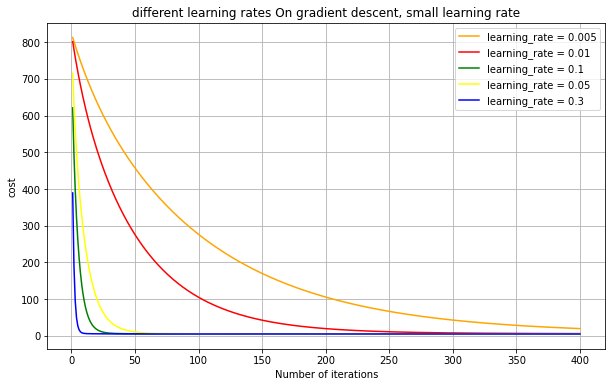

In [84]:
iterations = 400;
theta = np.zeros(12)

learning_rate = 0.005;
theta_1, cost_history_1 = gradient(X, y, theta, learning_rate, iterations)

learning_rate = 0.01;
theta_2, cost_history_2 = gradient(X, y, theta, learning_rate, iterations)

learning_rate = 0.1;
theta_3, cost_history_3 = gradient(X, y, theta, learning_rate, iterations)

learning_rate = 0.05;
theta_4, cost_history_4 = gradient(X, y, theta, learning_rate, iterations)

learning_rate = 0.3;
theta_5, cost_history_5 = gradient(X, y, theta, learning_rate, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='orange', label = 'learning_rate = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'learning_rate = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'learning_rate = 0.1')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'learning_rate = 0.05')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'learning_rate = 0.3')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.title("different learning rates On gradient descent, small learning rate")
plt.legend()

Text(0.5, 1.0, 'different learning rates On gradient descent, small learning rate large learning rate')

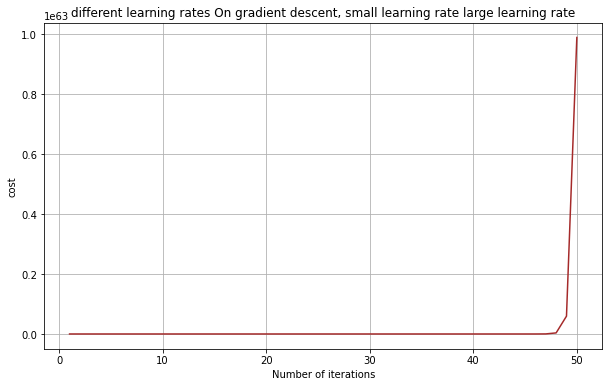

In [85]:
iterations = 50;
theta = np.zeros(12)

learning_rate = 1.0;
theta_6, cost_history_6 = gradient(X, y, theta, learning_rate, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.title("different learning rates On gradient descent, small learning rate large learning rate")

In [86]:
#(3)
#Normal Equation : no need to choose learning rate, dont need to iterate, need to compute
#dradient descent: need to choose learning rate, needs many iterations, works well even when n is large
#1. Gradient Descent algorithm needs to find an appropriate learning rate and requires repetitive operations. In contrast, Normal Equation can find in a single operation without an alpha value.
#2. As mentioned above, Normal Equation is greatly influenced by the number of features in obtaining X^t. So usually, if the feature is less than 10,000, the Normal Equation performs much better, but if it's more than that, the Gradient Descent algorithm is better.

In [87]:
#(4)We can see if learning rate is larger than 0.4(maybe) it is too high learning rate, so the graph's slope sign is change
#and we can see the best learning rate is may be 0.01 ~0.02 in red one because its slope is ideal.
#I find that learning rate is very important in gradient descent method

In [88]:
#(5) It is calculated by standardizing all variables to have an average of 0 and variance 1, and then estimating the regression equation. This is to determine the relative importance between these independent variables, especially when independent variables have different scales.

In [89]:
##Problem2
#sigmoid function
def sig(x):
    return 1 / (1 + np.exp(-x))

In [90]:
from scipy.optimize import fmin_tnc as fm
class LogisticRegression:
    def cost(self, theta, x, y):
        m = x.shape[0]
        return  -(1 / m) * np.sum(np.log(sig(np.dot(x, theta)))*y +  np.log(1 - sig(np.dot(x, theta)))*(1 - y) )

    def gradient(self, theta, x, y):
        return (1 / x.shape[0]) * np.dot(x.T, sig(np.dot(x, theta)) - y)

    def fit(self, x, y, theta):
        w = fm(func=self.cost, x0=theta, fprime=self.gradient, args=(x, y.flatten()))
        self.w = w[0]
        return self

    def predict(self, x):
        theta = self.w[:, np.newaxis]
        return sig(np.dot(x, theta))

    def accuracy(self, x, test):
        theta = self.w[:, np.newaxis]
        prdc = (sig(np.dot(x, theta)) >= 0.5).astype(int)
        prdc = prdc.flatten()
        return 100*np.mean(prdc == test)

Accuracy: 88.88888888888889 %



<ipython-input-91-00e1537dd4fa>:35: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_labels = train_labels[:, np.newaxis]
<ipython-input-91-00e1537dd4fa>:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  test_labels = test_labels[:, np.newaxis]


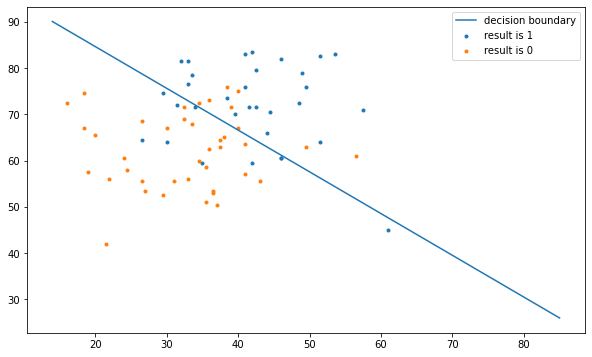

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    df_0 = pd.read_csv("P2_data_0.txt", header = None)
    df_1 = pd.read_csv("P2_data_1.txt", header = None)

    X_0 = df_0.iloc[:, :-1]
    X_1 = df_1.iloc[:, :-1]


    y_0 = df_0.iloc[:, -1]
    y_1 = df_1.iloc[:, -1]


    train_features_0, test_features_0, train_labels_0, test_labels_0 = train_test_split(X_0, y_0, test_size=0.25)
    train_features_1, test_features_1, train_labels_1, test_labels_1 = train_test_split(X_1, y_1, test_size=0.25)
    
    result_0 = df_0
    result_1 = df_1

    train_features = pd.concat([train_features_0,train_features_1])
    train_labels = pd.concat([train_labels_0,train_labels_1])
    
    test_features = pd.concat([test_features_0,test_features_1])
    test_labels = pd.concat([test_labels_0,test_labels_1])
    
    plt.scatter(result_1.iloc[:, 0], result_1.iloc[:, 1], s=9, label='result is 1')
    plt.scatter(result_0.iloc[:, 0], result_0.iloc[:, 1], s=9, label='result is 0')


    train_features = np.c_[np.ones((train_features.shape[0], 1)), train_features]
    train_labels = train_labels[:, np.newaxis]
    test_features = np.c_[np.ones((test_features.shape[0], 1)), test_features]
    test_labels = test_labels[:, np.newaxis]
    theta = np.zeros((train_features.shape[1], 1))

    model = LogisticRegression()
    model.fit(train_features, train_labels, theta)

    accuracy = model.accuracy(test_features, test_labels.flatten())
    parameters = model.w
    print("Accuracy: {} %\n".format(accuracy))
    
    x_values = [np.min(train_features[:, 1] - 2), np.max(train_features[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    plt.plot(x_values, y_values, label='decision boundary')
    plt.legend()
    plt.show()


In [92]:
a = LogisticRegression.predict(model,[[1, 49.5, 55.0]])
b = LogisticRegression.predict(model,[[1, 43.0, 74.0]])
c = LogisticRegression.predict(model,[[1, 33.5, 70.5]])
d = LogisticRegression.predict(model,[[1, 30.0, 78.0]])

In [93]:
print("a result = ",a[0][0])
if a[0][0]>=0.5:
    print("a is admitted")
else:
    print("a is not admitted")

a result =  0.40803679591967973
a is not admitted


In [94]:
print("b result = ",b[0][0])
if b[0][0]>=0.5:
    print("b is admitted")
else:
    print("b is not admitted")

b result =  0.7766351643020952
b is admitted


In [95]:
print("c result = ",c[0][0])
if c[0][0]>=0.5:
    print("c is admitted")
else:
    print("c is not admitted")

c result =  0.44001227197862197
c is not admitted


In [96]:
print("d result = ",d[0][0])
if d[0][0]>=0.5:
    print("d is admitted")
else:
    print("d is not admitted")

d result =  0.5729308931972998
d is admitted
